# Notebook for data set exploration

This notebook explores the provided data set to guide the feature selection.

In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load the data set
df = pd.read_csv('ds_train.csv')

In [4]:
df.head()

current_price  days_before_departure departure_date direction  \
0            100                      0     2018-01-02  outbound   
1            100                      1     2018-01-02  outbound   
2            100                      2     2018-01-02  outbound   
3            100                      3     2018-01-02  outbound   
4            100                      4     2018-01-02  outbound   

   train_number  demand  od_destination_time_year  od_destination_time_month  \
0           941     1.0                      2018                          1   
1           941     1.0                      2018                          1   
2           941     0.0                      2018                          1   
3           941     1.0                      2018                          1   
4           941     0.0                      2018                          1   

   od_destination_time_week  od_destination_time_day  \
0                         1                        2   
1                         1                        2   
2                         1                        2   
3                         1                        2   
4                         1                        2   

   od_destination_time_weekday  od_destination_time_hour  \
0                            1                         7   
1                            1                         7   
2                            1                         7   
3                            1                         7   
4                            1                         7   

   od_destination_time_minute  od_origin_time_hour  od_origin_time_minute  \
0                          41                    5                     17   
1                          41                    5                     17   
2                          41                    5                     17   
3                          41                    5                     17   
4                          41                    5                     17   

   od_time_travel  
0           144.0  
1           144.0  
2           144.0  
3           144.0  
4           144.0

In [5]:
# Get some general information on the data set, chack that there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292650 entries, 0 to 292649
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   current_price                292650 non-null  int64  
 1   days_before_departure        292650 non-null  int64  
 2   departure_date               292650 non-null  object 
 3   direction                    292650 non-null  object 
 4   train_number                 292650 non-null  int64  
 5   demand                       292650 non-null  float64
 6   od_destination_time_year     292650 non-null  int64  
 7   od_destination_time_month    292650 non-null  int64  
 8   od_destination_time_week     292650 non-null  int64  
 9   od_destination_time_day      292650 non-null  int64  
 10  od_destination_time_weekday  292650 non-null  int64  
 11  od_destination_time_hour     292650 non-null  int64  
 12  od_destination_time_minute   292650 non-null  int64  
 13 

In [6]:
# We drop some useless columns from the data frame for the exploration
features = df.drop(columns=['departure_date', 'demand', 'train_number', 'od_destination_time_year'])

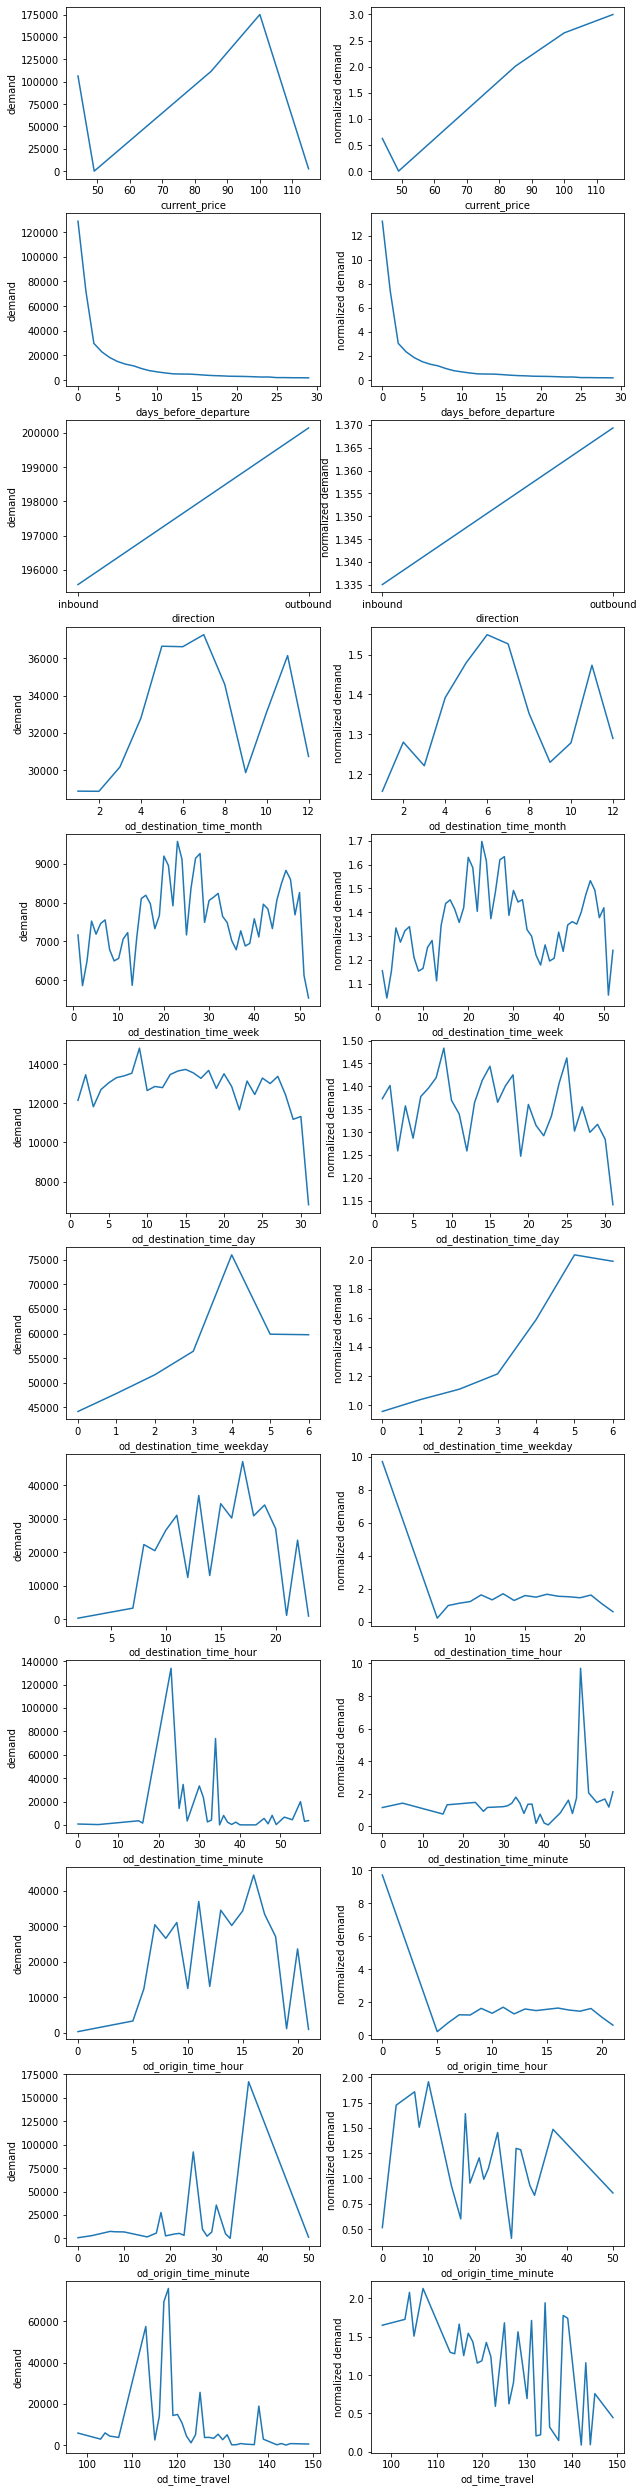

In [7]:
# First plots to visualize the demand with respect to the different other criteria, both in absolute demand and normalized by the number of occurrences of the criterion within the dataset
fig, ax = plt.subplots(len(features.columns), 2, figsize=(10,45))

for i, col in enumerate(features.columns):
    ax[i, 0].plot(df.groupby(col)['demand'].sum())
    ax[i, 1].plot(df.groupby(col)['demand'].sum() / df[col].value_counts())
    ax[i, 0].set_xlabel(col)
    ax[i, 0].set_ylabel('demand')
    ax[i, 1].set_xlabel(col)
    ax[i, 1].set_ylabel('normalized demand')

We see that the price, the days before departure, the month (or the week) and the weekday seem to be relevant features for the regression problem. Some of these features are correlated (month/week, price/day before departure) as shown by the following plot.

<AxesSubplot:>

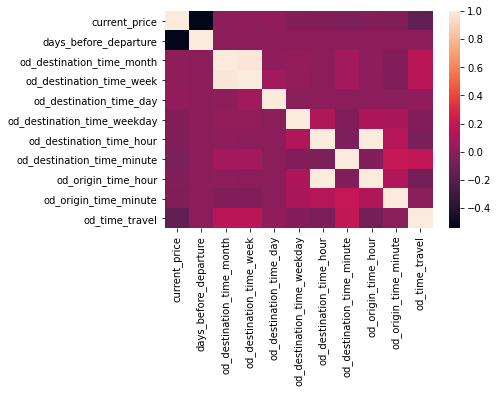

In [8]:
corr_mat = features.corr()
sns.heatmap(corr_mat)

Let us look at the distribution of the daily sales.

<AxesSubplot:xlabel='demand'>

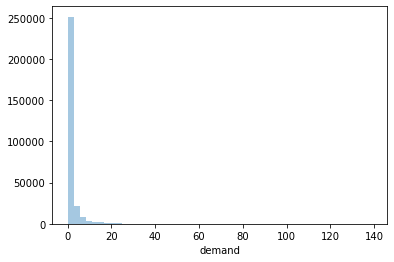

In [9]:
sns.distplot(df['demand'], kde=False)

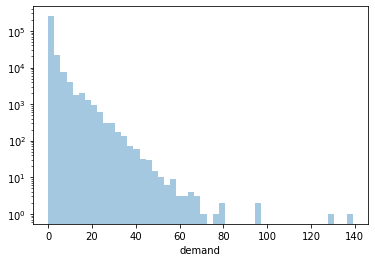

In [11]:
fig, ax = plt.subplots()
sns.distplot(df['demand'], kde=False, ax=ax)
ax.set_yscale('log')

We see that the distribution has a long tail, so we can either fit the model to predict the log of the demand or choose the mean squared logarithmic error as loss function.